In [10]:
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as graph

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression

graph.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Data/student-mat.csv', sep=';')
df.columns = [col.strip().lower() for col in df.columns]

print(df.shape)
df.head()

(395, 33)


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


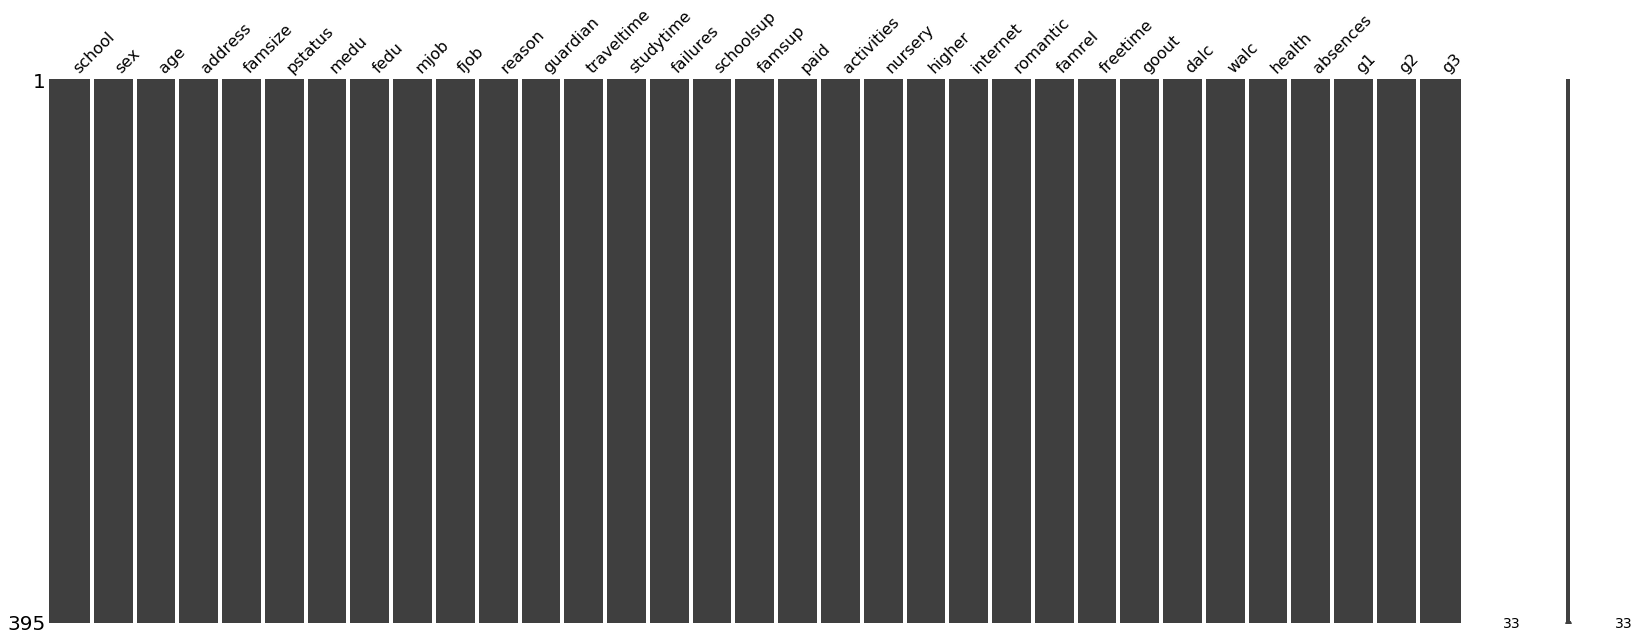

In [3]:
missingno.matrix(df)
graph.show()

In [4]:
y = df.pop('g3')

x_train, x_test, y_train, y_test = train_test_split(df, y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
display(x_train.head())

(296, 32) (99, 32) (296,) (99,)


,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2
317,GP,F,18,U,GT3,T,4,3,other,other,...,yes,4,3,4,1,1,5,9,9,10
358,MS,M,18,U,LE3,T,1,1,other,services,...,yes,3,3,2,1,2,3,4,10,10
282,GP,F,18,R,LE3,T,1,1,at_home,other,...,no,5,2,2,1,1,3,1,12,12
178,GP,M,16,R,GT3,T,4,2,teacher,services,...,yes,4,3,3,3,4,3,10,10,8
76,GP,M,15,U,GT3,T,4,0,teacher,other,...,no,3,4,3,1,1,1,8,11,11


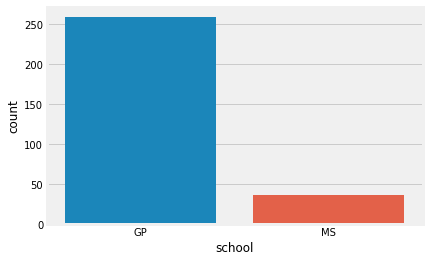

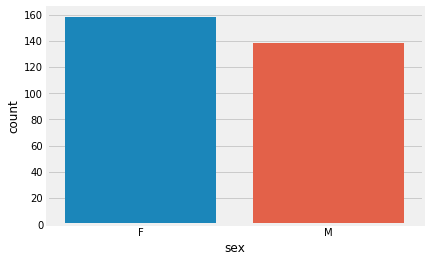

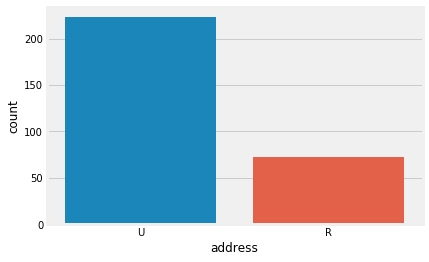

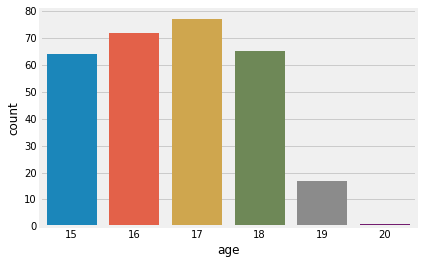

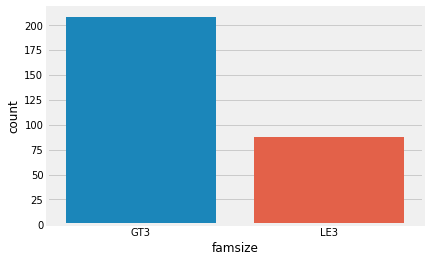

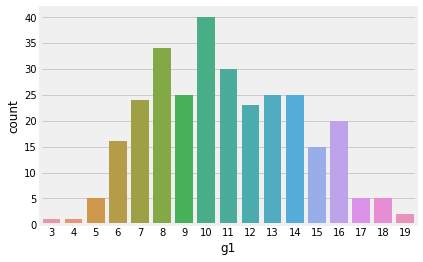

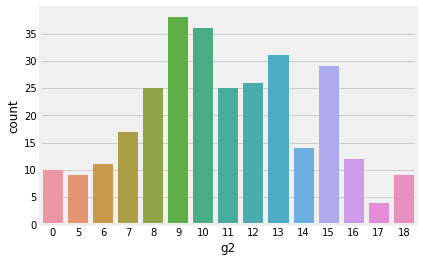

In [6]:
for col in ['school', 'sex', 'address', 'age', 'famsize', 'g1', 'g2']:
    sns.countplot(x=col, data=x_train)
    graph.show()

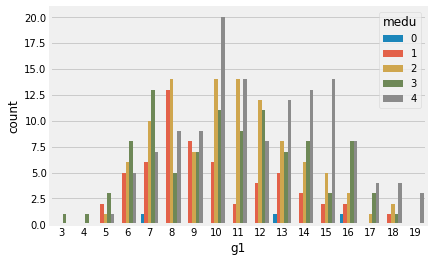

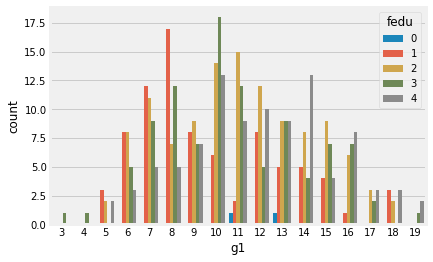

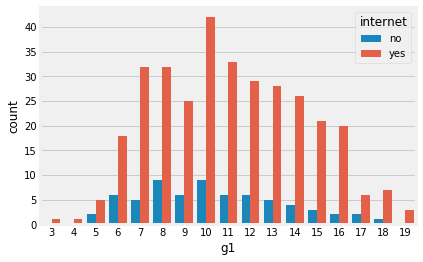

In [7]:
for col in ['medu', 'fedu', 'internet']:
    sns.countplot(x='g1', hue=col, data=df)
    graph.show()

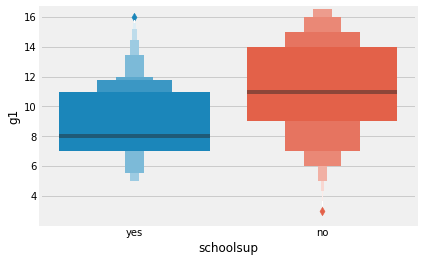

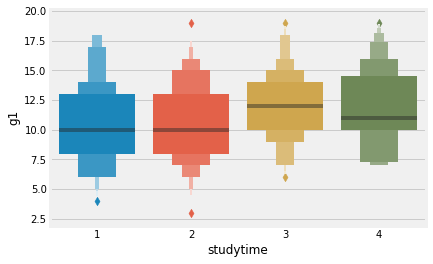

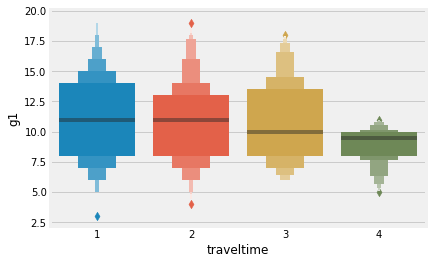

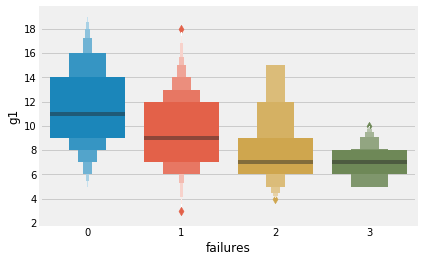

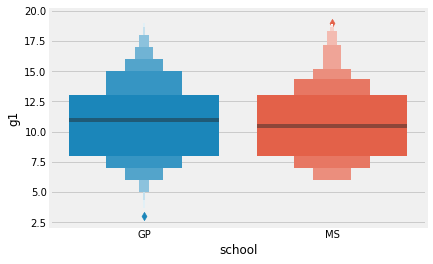

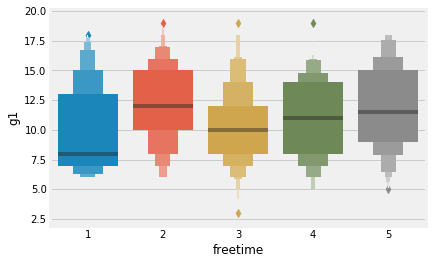

In [8]:
for col in ['schoolsup', 'studytime', 'traveltime', 'failures', 'school', 'freetime']:
    sns.boxenplot(x=col, y='g1', data=df)
    graph.show()

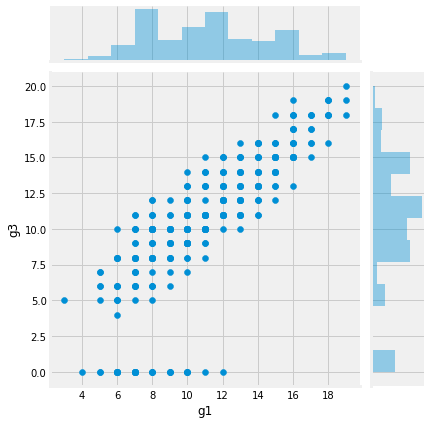

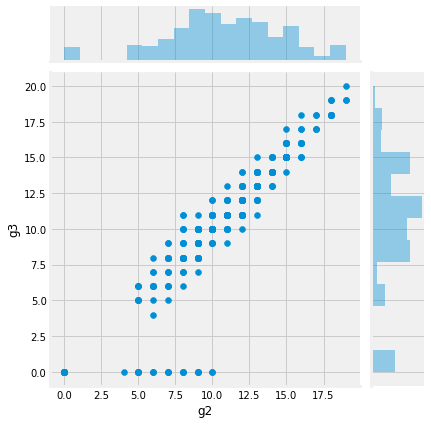

In [9]:
for col in ['g1', 'g2']:
    sns.jointplot(x=col, y=y, data=df)
    graph.show()

In [27]:
use_cols = ['g1', 'g2']

model = LinearRegression()
model.fit(x_train[use_cols], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
model.score(x_train[use_cols], y_train)

0.8143297781357064

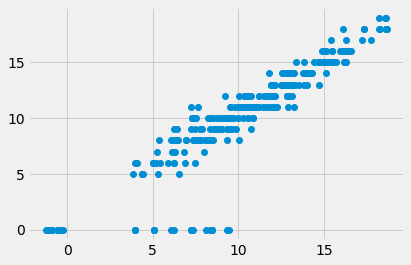

In [29]:
y_train_pred = model.predict(x_train[use_cols])

graph.plot(y_train_pred, y_train, 'o')
graph.show()

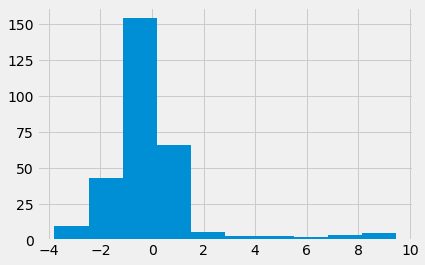

In [30]:
graph.hist(y_train_pred - y_train)
graph.show()